In [1]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

url = "https://drive.google.com/uc?export=download&id=1tEvJfPhYg0t5NXUKX66GGPLSk0EMYIF1"

games = pd.read_csv(url)
games = games.drop("url", axis=1)
games["genre"] = games["genre"].fillna("[\'None\']")
games["genre"] = games["genre"].apply(eval)

games['rating'] = games['rating'].fillna('Unknown')
games['developer'] = games['developer'].fillna('Undisclosed')
games['type'] = games['type'].fillna('Untold')

games.head()

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"[Action Adventure, Fantasy]",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"[Action, Platformer, 3D]",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"[Action, Shooter, First-Person, Sci-Fi]",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"[Action, Platformer, 3D]",singleplayer,E10+


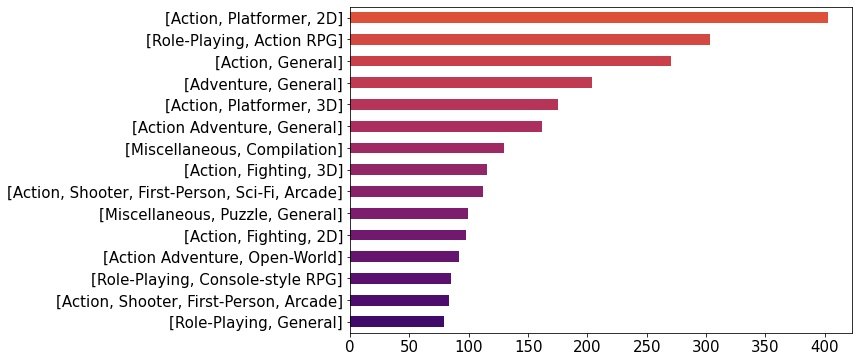

In [2]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(0.4, 0.8, 15))
games['genre'].value_counts()[0:15].plot(kind='barh', figsize=[9,6], fontsize=15, color=color).invert_yaxis()

In [3]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(games["genre"]).value_counts()

Action              3125
General             2488
Action Adventure    1208
Shooter             1101
Role-Playing        1059
                    ... 
Civilian Plane         2
Bowling                2
Tank                   1
Drag                   1
Skating                1
Length: 169, dtype: int64

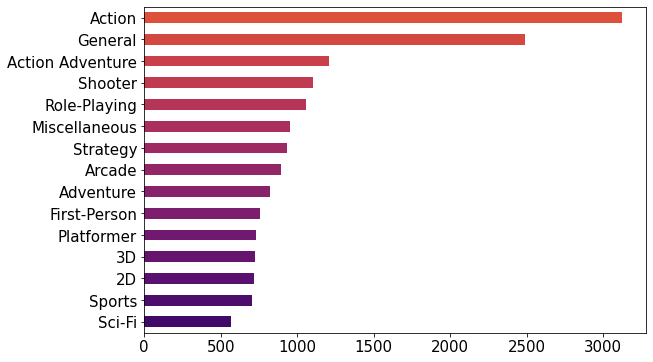

In [4]:
to_1D(games['genre']).value_counts()[0:15].plot(kind='barh', figsize=[9,6], fontsize=15, color=color).invert_yaxis()

In [5]:
games['Key_words'] = ''
r = Rake()
for index, row in games.iterrows():
    r.extract_keywords_from_text(row['description'])
    key_words_dict_scores = r.get_word_degrees()
    games.at[index, "Key_words"] = list(key_words_dict_scores.keys())

games.head()

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,Key_words
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"[Action Adventure, Fantasy]",singleplayer,E,"[young, boy, link, tricked, ganondorf, king, g..."
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E,"[metacritic, 2007, wii, game, year, ultimate, ..."
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"[Action, Platformer, 3D]",singleplayer,E,"[super, mario, galaxy, 2, sequel, hopping, ori..."
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"[Action, Shooter, First-Person, Sci-Fi]",singleplayer,T,"[samus, returns, new, mission, unravel, myster..."
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"[Action, Platformer, 3D]",singleplayer,E10+,"[new, evolution, mario, sandbox, style, gamepl..."


In [6]:
games['type'] = games['type'].map(lambda x: x.split(','))
games['rating'] = games['rating'].map(lambda x: x.split(','))
games['developer'] = games['developer'].map(lambda x: x.split(','))
for index, row in games.iterrows():
    games.at[index, 'type'] = [x.lower().replace(' ','') for x in row['type']]
    games.at[index, 'rating'] = [x.lower().replace(' ','') for x in row['rating']]
    games.at[index, 'developer'] = [x.lower().replace(' ','') for x in row['developer']]

games.head()

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,Key_words
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",[nintendo],"[Action Adventure, Fantasy]",[singleplayer],[e],"[young, boy, link, tricked, ganondorf, king, g..."
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,[nintendo],"[Action, Platformer, 3D]",[singleplayer],[e],"[metacritic, 2007, wii, game, year, ultimate, ..."
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",[nintendoeadtokyo],"[Action, Platformer, 3D]",[singleplayer],[e],"[super, mario, galaxy, 2, sequel, hopping, ori..."
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,[retrostudios],"[Action, Shooter, First-Person, Sci-Fi]",[singleplayer],[t],"[samus, returns, new, mission, unravel, myster..."
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,[nintendo],"[Action, Platformer, 3D]",[singleplayer],[e10+],"[new, evolution, mario, sandbox, style, gamepl..."


In [7]:
games['Bag_of_words'] = ''
columns = ['genre', 'developer', 'rating', 'type', 'Key_words']
for index, row in games.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    games.at[index, 'Bag_of_words'] = words
    
games_rec = games[['game_name','Bag_of_words']]

In [8]:
count = CountVectorizer()
count_matrix = count.fit_transform(games_rec['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.06539825 0.06673261 ... 0.02831827 0.05391639 0.09302326]
 [0.06539825 1.         0.31276737 ... 0.03981726 0.05685735 0.06539825]
 [0.06673261 0.31276737 1.         ... 0.02708645 0.05157106 0.08897681]
 ...
 [0.02831827 0.03981726 0.02708645 ... 1.         0.03282661 0.05663655]
 [0.05391639 0.05685735 0.05157106 ... 0.03282661 1.         0.        ]
 [0.09302326 0.06539825 0.08897681 ... 0.05663655 0.         1.        ]]


In [9]:
indices = pd.Series(games_rec["game_name"])

def recommend(title, cosine_sim = cosine_sim):
    recommended_games = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_games.append(list(games_rec['game_name'])[i])
        
    return np.vstack((recommended_games,score_series.iloc[1:11].values)).T

recommend('Super Mario Galaxy')

array([['Super Mario Galaxy 2', '0.3127673715578024'],
       ['Super Mario 3D World', '0.26339329200376005'],
       ['Super Mario 64 DS', '0.2346942057358599'],
       ['Angry Video Game Nerd Adventures', '0.22145461294330657'],
       ['Super Paper Mario', '0.21992141249949376'],
       ['Geometry Wars: Galaxies', '0.21771307016784763'],
       ['Super Mario 3D Land', '0.2156484889823707'],
       ['The Legend of Zelda: Twilight Princess', '0.21479444568068934'],
       ['Super Mario Odyssey', '0.21150505800565567'],
       ['Samurai Warriors 3', '0.21055872190307895']], dtype='<U38')

In [10]:
recommend('Phoenix Wright: Ace Attorney - Trials and Tribulations')

array([['Phoenix Wright: Ace Attorney - Justice for All',
        '0.3984095364447984'],
       ['Phoenix Wright: Ace Attorney Trilogy', '0.3463446961136798'],
       ['Phoenix Wright: Ace Attorney', '0.30210898905832195'],
       ['Apollo Justice: Ace Attorney', '0.262128916206451'],
       ['Harvey Birdman: Attorney at Law', '0.2467838236981868'],
       ['Phoenix Wright: Ace Attorney - Spirit of Justice',
        '0.21912524504463893'],
       ['Aviary Attorney', '0.2150597223603683'],
       ['Law & Order: Dead on the Money', '0.19478290326359252'],
       ['Nine Hours, Nine Persons, Nine Doors', '0.19218555339901836'],
       ['CSI: Crime Scene Investigation: Dark Motives',
        '0.19080659174875084']], dtype='<U48')

In [11]:
recommend('Madden NFL 19')

array([['Madden NFL 12', '0.32475952641916456'],
       ['Madden NFL 09 All-Play', '0.3174055271363692'],
       ['Madden NFL 11', '0.288675134594813'],
       ['NCAA Football 08', '0.28614654455582783'],
       ['NBA Live 10', '0.2829582292090551'],
       ['NFL Head Coach 09', '0.27801921874276647'],
       ['NCAA Football 11', '0.2769558547034987'],
       ['Madden NFL 07', '0.27386127875258304'],
       ['Madden NFL 08', '0.2702180588945729'],
       ['Madden NFL 13', '0.26837252006084666']], dtype='<U32')

In [12]:
recommend('Subnautica')

array([['Subnautica: Below Zero', '0.31760814798505266'],
       ['Flood of Light', '0.2491364395612199'],
       ['The Inner Friend', '0.24313226954193232'],
       ['The Survivalists', '0.237880413380021'],
       ['Breathedge', '0.2375422747394687'],
       ['Into the Stars', '0.23200591622629663'],
       ['The Persistence', '0.22742941307367107'],
       ['Infernium', '0.22742941307367104'],
       ['Vesta', '0.22742941307367104'],
       ['Life is Strange: Before the Storm - Episode 3: Hell is Empty',
        '0.22742941307367104']], dtype='<U60')

In [13]:
def listToString(stringaslist,delimitor): 
    twine = "" 

    for i,element in enumerate(stringaslist): 
        twine += (str(i + 1) + ". " + element[0] + "-->" + element[1] + delimitor)   

    return twine


# Using the slice notation, removing the appended comma at the end
print(listToString(recommend('Subnautica'),'\n')[:-1]) 

1. Subnautica: Below Zero-->0.31760814798505266
2. Flood of Light-->0.2491364395612199
3. The Inner Friend-->0.24313226954193232
4. The Survivalists-->0.237880413380021
5. Breathedge-->0.2375422747394687
6. Into the Stars-->0.23200591622629663
7. The Persistence-->0.22742941307367107
8. Infernium-->0.22742941307367104
9. Vesta-->0.22742941307367104
10. Life is Strange: Before the Storm - Episode 3: Hell is Empty-->0.22742941307367104


In [ ]:
import tkinter as tk

window = tk.Tk()

def retrieve_input():
    textIn = myEntry.get()
    newWindow = tk.Toplevel(window)
    newWindow.title("10 Similar Games")
    tk.Label(newWindow, text=listToString(recommend(textIn),'\n\n')[:-1], height=20, foreground='#F3E8CF', background='#233788').pack()

label = tk.Label(text="Input the name of a game:", foreground='#233788', background='#F3E8CF', width=40, height=10)
myEntry = tk.Entry(foreground='black', background='white', width=40)

label.pack()
myEntry.pack()

submit = tk.Button(window, height=1, width=10, text="Search", command=lambda: retrieve_input())
submit.pack()


window.mainloop()
